In [51]:
%reload_ext autoreload
%autoreload 2
import sys
from dotenv import load_dotenv
import os
import psycopg
load_dotenv()

ROOT = os.getenv("ROOT")
sys.path.append(ROOT)
from src.paths import DATA_PATH
from src.database.connection import connect
from src.database.db_functions import get_amazon_dataframe

In [52]:
with connect(db_key="main") as conn:
    with conn.cursor() as cur:
        df = get_amazon_dataframe(cur=cur, categories=None, limit=10000)

In [55]:
df.describe()

,average_rating,rating_number,price,id,rating,helpful_vote
count,10000.000000,10000.000000,2657.000000,10000.000000,10000.00000,10000.000000
mean,4.048480,572.358600,21.657881,15359.596800,4.07030,1.034700
std,0.569847,1490.884926,26.236433,4964.942213,1.37337,5.833052
min,1.000000,1.000000,1.200000,10124.000000,1.00000,0.000000
25%,3.700000,23.000000,9.990000,12631.750000,3.00000,0.000000
50%,4.100000,95.000000,15.870000,15131.500000,5.00000,0.000000
75%,4.500000,373.000000,24.900000,17636.250000,5.00000,1.000000
max,5.000000,15264.000000,477.060000,98782.000000,5.00000,419.000000


<Axes: >

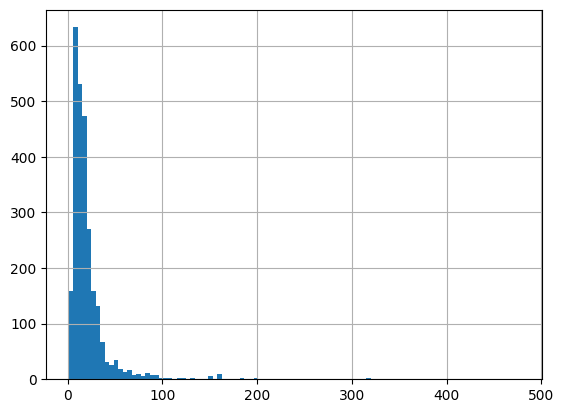

In [61]:
df["price"].hist(bins=100)